In [1]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
file_path = 'Jalen Bronson Regular Season Totals (1).xlsx'
df = pd.read_excel(file_path)

In [5]:
print(df.head())

    SEASON TEAM  Field Goals Made Per Game  Field Goals Attempted Per Game  \
0  2018-19  DAL                      264.0                           565.0   
1  2019-20  DAL                      181.0                           388.0   
2  2020-21  DAL                      328.0                           627.0   
3  2021-22  DAL                      506.0                          1008.0   
4  2022-23   NY                      587.0                          1195.0   

   Field Goal Percentage  3-Point Field Goals Made Per Game  \
0               0.467257                                 63   
1               0.466495                                 43   
2               0.523126                                 81   
3               0.501984                                 94   
4               0.491213                                134   

   3-Point Field Goals Attempted Per Game  3-Point Field Goal Percentage  \
0                                     181                       0.348066   


In [6]:
print(df.describe())

       Field Goals Made Per Game  Field Goals Attempted Per Game  \
count                    6.00000                        6.000000   
mean                   373.20000                      756.600000   
std                    151.16534                      298.251303   
min                    181.00000                      388.000000   
25%                    280.00000                      580.500000   
50%                    350.60000                      691.800000   
75%                    472.80000                      945.150000   
max                    587.00000                     1195.000000   

       Field Goal Percentage  3-Point Field Goals Made Per Game  \
count               6.000000                           6.000000   
mean                0.490015                          83.000000   
std                 0.021504                          30.744105   
min                 0.466495                          43.000000   
25%                 0.472946                        

In [7]:
print(df.columns)

Index(['SEASON', 'TEAM', 'Field Goals Made Per Game',
       'Field Goals Attempted Per Game', 'Field Goal Percentage',
       '3-Point Field Goals Made Per Game',
       '3-Point Field Goals Attempted Per Game',
       '3-Point Field Goal Percentage', 'Free Throws Made Per Game',
       'Free Throws Attempted Per Game', 'Free Throw Percentage',
       'Offensive Rebounds Per Game', 'Defensive Rebounds Per Game',
       'Rebounds Per Game', 'Assists Per Game', 'Blocks Per Game',
       'Steals Per Game', 'Fouls Per Game', 'Turnovers Per Game',
       'Points Per Game', 'PointsNextSeason'],
      dtype='object')


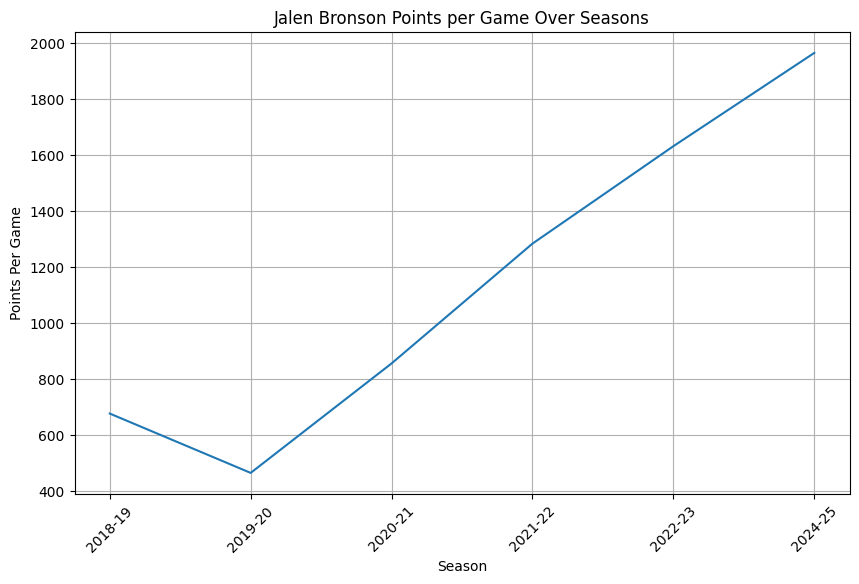

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='SEASON', y='Points Per Game')
plt.title('Jalen Bronson Points per Game Over Seasons')
plt.xlabel('Season')
plt.ylabel('Points Per Game')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [9]:
df['PointsNextSeason'] = df['Points Per Game'].shift(-1)

In [10]:
df = df.dropna()

In [11]:
features = [
    'Field Goals Made Per Game', 'Field Goals Attempted Per Game', 
    'Field Goal Percentage', '3-Point Field Goals Made Per Game', 
    '3-Point Field Goals Attempted Per Game', '3-Point Field Goal Percentage',
    'Free Throws Made Per Game', 'Free Throws Attempted Per Game', 
    'Free Throw Percentage', 'Offensive Rebounds Per Game', 
    'Defensive Rebounds Per Game', 'Rebounds Per Game', 'Assists Per Game', 
    'Blocks Per Game', 'Steals Per Game', 'Fouls Per Game', 
    'Turnovers Per Game', 'Points Per Game'
]
target = 'PointsNextSeason'

In [12]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
y_test

1    857.0
Name: PointsNextSeason, dtype: float64

In [25]:
y_train

4    1966.18
2    1285.00
0     466.00
3    1633.00
Name: PointsNextSeason, dtype: float64

In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3936.081739240015


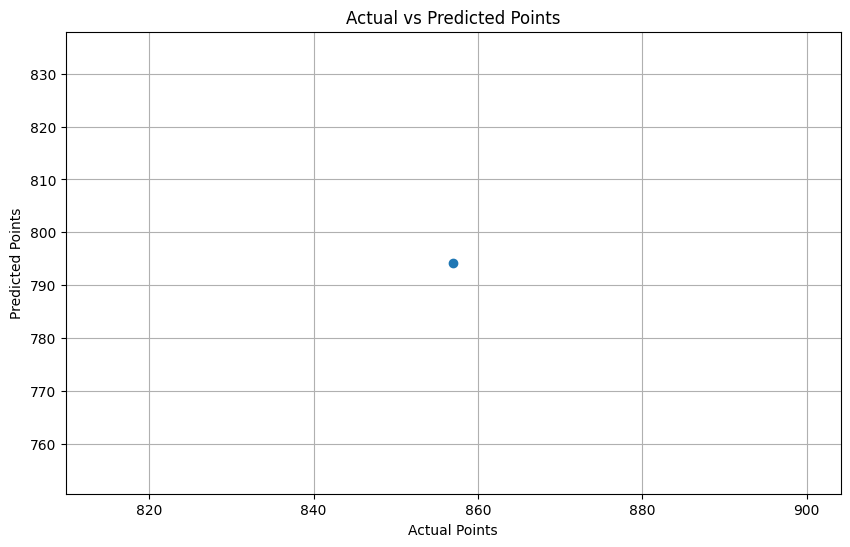

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points')
plt.grid(True)
plt.show()

In [17]:
latest_data = df[features].iloc[-1].values.reshape(1, -1)
prediction = model.predict(latest_data)
print(f'Predicted Points for 2024-2025 Season: {prediction[0]}')

Predicted Points for 2024-2025 Season: 1796.5641999999968


/Users/Murphboy/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [18]:
new_row = {
    'SEASON': '2024-25',
    'TEAM': df['TEAM'].iloc[-1],  # Assuming the team remains the same
    'Field Goals Made Per Game': df['Field Goals Made Per Game'].mean(),  # Example: use mean or some value
    'Field Goals Attempted Per Game': df['Field Goals Attempted Per Game'].mean(),
    'Field Goal Percentage': df['Field Goal Percentage'].mean(),
    '3-Point Field Goals Made Per Game': df['3-Point Field Goals Made Per Game'].mean(),
    '3-Point Field Goals Attempted Per Game': df['3-Point Field Goals Attempted Per Game'].mean(),
    '3-Point Field Goal Percentage': df['3-Point Field Goal Percentage'].mean(),
    'Free Throws Made Per Game': df['Free Throws Made Per Game'].mean(),
    'Free Throws Attempted Per Game': df['Free Throws Attempted Per Game'].mean(),
    'Free Throw Percentage': df['Free Throw Percentage'].mean(),
    'Offensive Rebounds Per Game': df['Offensive Rebounds Per Game'].mean(),
    'Defensive Rebounds Per Game': df['Defensive Rebounds Per Game'].mean(),
    'Rebounds Per Game': df['Rebounds Per Game'].mean(),
    'Assists Per Game': df['Assists Per Game'].mean(),
    'Blocks Per Game': df['Blocks Per Game'].mean(),
    'Steals Per Game': df['Steals Per Game'].mean(),
    'Fouls Per Game': df['Fouls Per Game'].mean(),
    'Turnovers Per Game': df['Turnovers Per Game'].mean(),
    'Points Per Game': prediction[0]
}

In [19]:
df = df.append(new_row, ignore_index=True)

In [20]:
df.to_excel(file_path, index=False)
print(f"Prediction for the 2024-2025 season added to the Excel file: {file_path}")

Prediction for the 2024-2025 season added to the Excel file: Jalen Bronson Regular Season Totals (1).xlsx


In [21]:
df_updated = pd.read_excel(file_path)
print(df_updated.tail())

    SEASON TEAM  Field Goals Made Per Game  Field Goals Attempted Per Game  \
1  2019-20  DAL                      181.0                           388.0   
2  2020-21  DAL                      328.0                           627.0   
3  2021-22  DAL                      506.0                          1008.0   
4  2022-23   NY                      587.0                          1195.0   
5  2024-25   NY                      373.2                           756.6   

   Field Goal Percentage  3-Point Field Goals Made Per Game  \
1               0.466495                                 43   
2               0.523126                                 81   
3               0.501984                                 94   
4               0.491213                                134   
5               0.490015                                 83   

   3-Point Field Goals Attempted Per Game  3-Point Field Goal Percentage  \
1                                     120                       0.358333   


In [22]:
del df['PointsNextSeason']

In [23]:
print("Updated DataFrame with Prediction for 2024-2025 Season:")
display(df.tail())

Updated DataFrame with Prediction for 2024-2025 Season:


,SEASON,TEAM,Field Goals Made Per Game,Field Goals Attempted Per Game,Field Goal Percentage,3-Point Field Goals Made Per Game,3-Point Field Goals Attempted Per Game,3-Point Field Goal Percentage,Free Throws Made Per Game,Free Throws Attempted Per Game,Free Throw Percentage,Offensive Rebounds Per Game,Defensive Rebounds Per Game,Rebounds Per Game,Assists Per Game,Blocks Per Game,Steals Per Game,Fouls Per Game,Turnovers Per Game,Points Per Game
1,2019-20,DAL,181.0,388.0,0.466495,43.0,120.0,0.358333,61.0,75.0,0.813333,22.0,112.0,134.0,188.0,4.0,22.0,74.0,66.0,466.0000
2,2020-21,DAL,328.0,627.0,0.523126,81.0,200.0,0.405000,120.0,151.0,0.794702,27.0,204.0,231.0,239.0,1.0,35.0,109.0,80.0,857.0000
3,2021-22,DAL,506.0,1008.0,0.501984,94.0,252.0,0.373016,179.0,213.0,0.840376,43.0,266.0,309.0,377.0,3.0,66.0,151.0,124.0,1285.0000
4,2022-23,NY,587.0,1195.0,0.491213,134.0,322.0,0.416149,325.0,392.0,0.829082,40.0,201.0,241.0,421.0,15.0,61.0,152.0,142.0,1633.0000
5,2024-25,NY,373.2,756.6,0.490015,83.0,215.0,0.380113,154.4,190.2,0.800499,31.4,185.4,216.8,291.0,5.4,44.2,122.6,100.0,1796.5642
